In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne
import pylsl
import stream_viewer

from pylsl import StreamInlet, resolve_stream


In [16]:

from pylsl import resolve_stream

# Find all available streams
streams = resolve_stream()

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

sample, _ = inlet.pull_sample()

print(len(sample))

Stream 1:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_JakeTear
  Channels: 19
  Sampling Rate: 256.0 Hz

19


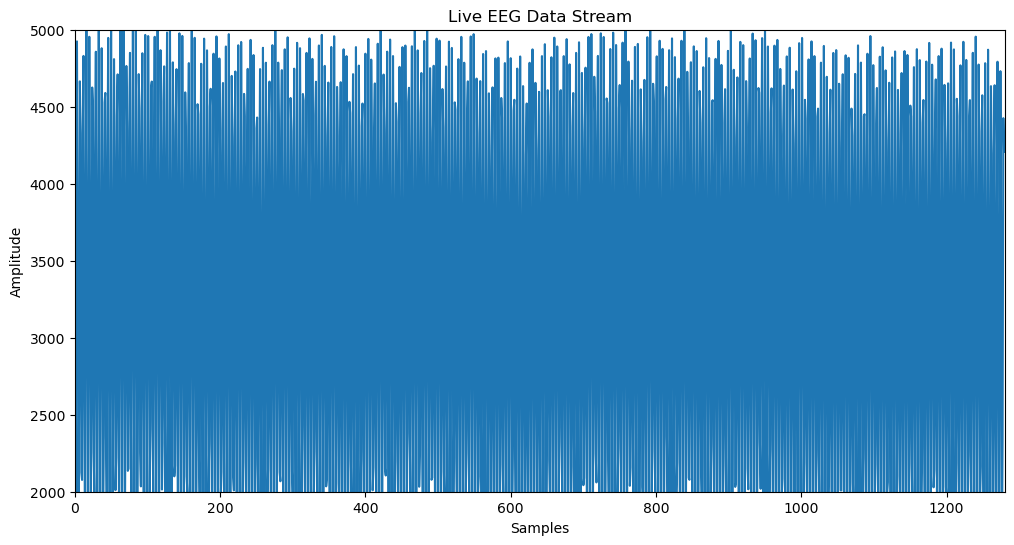

1


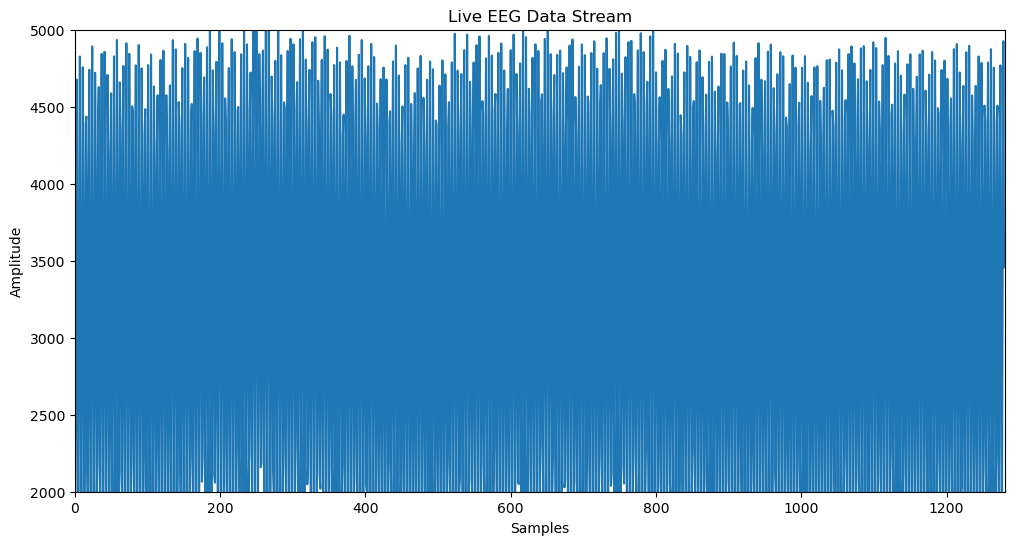

2


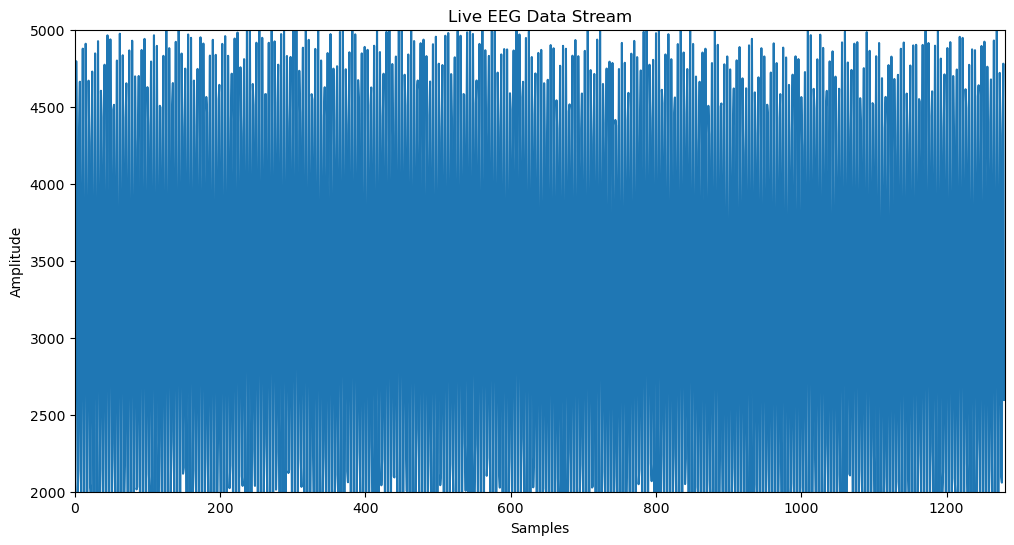

3


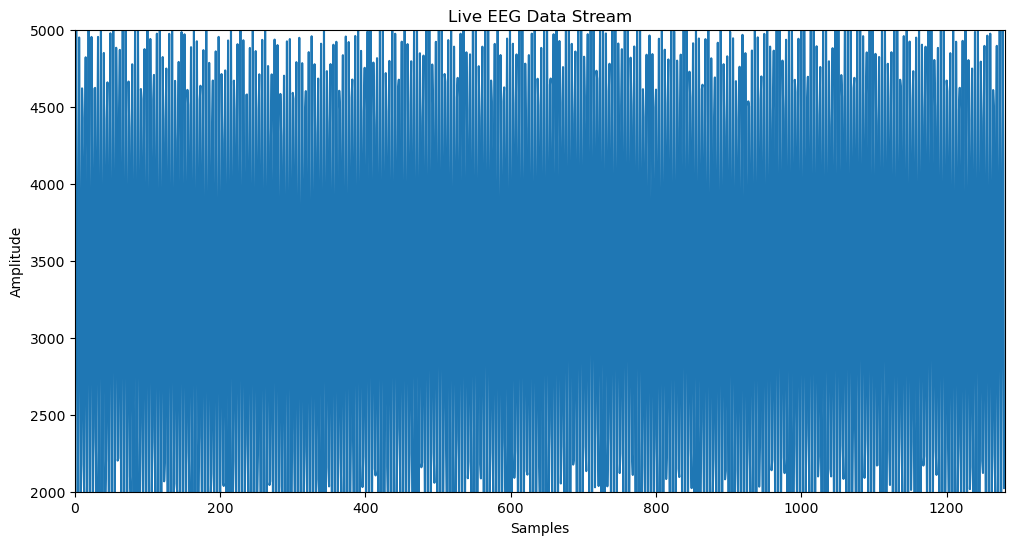

4


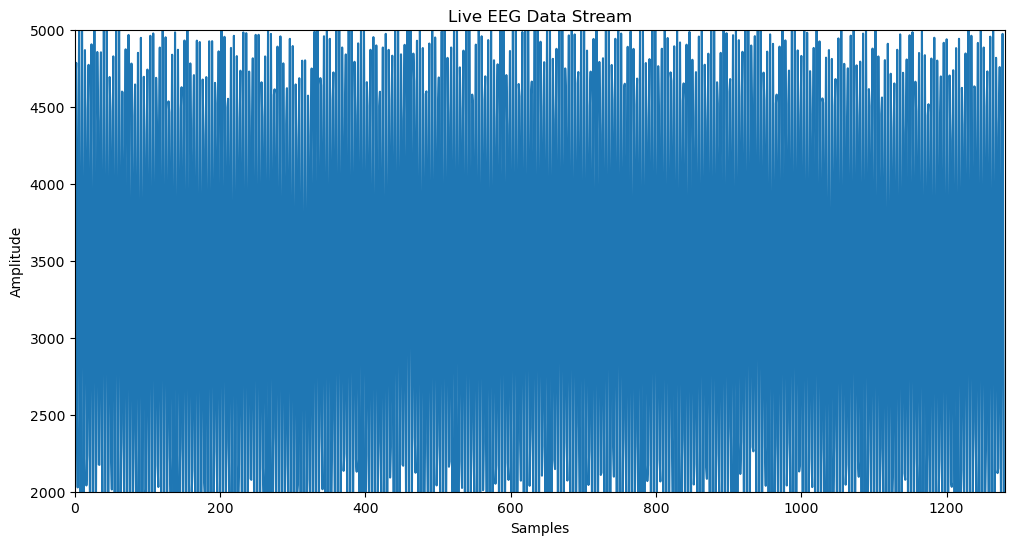

5
Streaming stopped.


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import time
from pylsl import StreamInlet, resolve_stream

# Resolve and open the LSL stream
streams = resolve_stream()
inlet = StreamInlet(streams[0])

# Parameters
sampling_rate = 256  # samples per second
window_length = 5    # seconds
buffer_size = sampling_rate * window_length  # 1280 samples for 5 seconds at 256 Hz

# Buffer for holding the last 5 seconds of data
data_buffer = np.zeros(buffer_size)

# Set up the plot
start_time = time.time()
x = 0
try:
    while True:

        time.sleep(max(0, 5.0 - elapsed_time))
        # Pull samples for 1 second
        new_data = []
        for _ in range(buffer_size):  # 256 samples per second
            sample, _ = inlet.pull_sample()
            new_data.append(sample[0])  # Assuming single-channel data; adjust for multi-channel

        # Update the buffer with new data, shifting older data out
        data_buffer = np.roll(data_buffer, -buffer_size)
        data_buffer[-buffer_size:] = np.array(new_data).flatten()
        fig, ax = plt.subplots(figsize=(12, 6))
        line, = ax.plot(data_buffer)
        ax.set_ylim(2000, 5000)  # Adjust y-axis limits as needed based on signal range
        ax.set_title("Live EEG Data Stream")
        ax.set_xlabel("Samples")
        ax.set_ylabel("Amplitude")
        # Update the plot with the new buffer data
        line.set_ydata(data_buffer)

        ax.set_xlim(0, buffer_size)  # Adjust the x-axis range
        plt.pause(0.001)  # Small pause to update the plot

        # Maintain a 1-second loop interval
        elapsed_time = time.time() - start_time
        x = x+1
        print(x)
        

except KeyboardInterrupt:
    print("Streaming stopped.")

# Close plot on exit
plt.show()
